In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

In [62]:

df = pd.read_csv('bank-full.csv', sep=';')
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [63]:
missing_values = df.isnull().sum()
print('Missing values: \n', missing_values)

Missing values: 
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [64]:
colomns_to_use = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 
    'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[colomns_to_use]
print(df.head())

   age           job  marital  education  balance housing  contact  day month  \
0   58    management  married   tertiary     2143     yes  unknown    5   may   
1   44    technician   single  secondary       29     yes  unknown    5   may   
2   33  entrepreneur  married  secondary        2     yes  unknown    5   may   
3   47   blue-collar  married    unknown     1506     yes  unknown    5   may   
4   33       unknown   single    unknown        1      no  unknown    5   may   

   duration  campaign  pdays  previous poutcome   y  
0       261         1     -1         0  unknown  no  
1       151         1     -1         0  unknown  no  
2        76         1     -1         0  unknown  no  
3        92         1     -1         0  unknown  no  
4       198         1     -1         0  unknown  no  


In [65]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
print(df['y'].value_counts())

y
0    39922
1     5289
Name: count, dtype: int64


In [66]:
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print(f'Train data: {train_data.shape}')
print(f'Validation data: {valid_data.shape}')
print(f'Test data: {test_data.shape}')

Train data: (27126, 15)
Validation data: (9042, 15)
Test data: (9043, 15)


In [67]:
categorical_colomns = ['job','marital', 'education', 'contact', 'housing', 'poutcome']
X_train = pd.get_dummies(train_data.drop('y', axis = 1), columns=categorical_colomns)
y_train = train_data['y']

X_valid = pd.get_dummies(valid_data.drop('y', axis = 1), columns=categorical_colomns)
y_valid = valid_data['y']

print(X_train.head())

       age  balance  day month  duration  campaign  pdays  previous  \
6377    45     -100   27   may       240         6     -1         0   
17236   29      166   28   jul       108         8     -1         0   
4490    31      121   20   may       187         1     -1         0   
24231   40     1693   17   nov       353         1     -1         0   
3978    28      317   16   may        21         3     -1         0   

       job_admin.  job_blue-collar  ...  education_unknown  contact_cellular  \
6377        False            False  ...              False             False   
17236       False            False  ...              False              True   
4490         True            False  ...              False             False   
24231       False            False  ...              False              True   
3978        False            False  ...              False             False   

       contact_telephone  contact_unknown  housing_no  housing_yes  \
6377               Fal

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cat_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[cat_cols])
X_numeric = df.select_dtypes(include=['int64', 'float64'])
X_numeric_scaled = scaler.fit_transform(X_numeric)

X_final_scaled = np.hstack((X_numeric_scaled, X_encoded))

X_train, X_test, y_train, y_test = train_test_split(X_final_scaled, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=3000) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 1.000


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

cat_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[cat_cols])
feature_names = encoder.get_feature_names_out(cat_cols)

X_train_df = pd.DataFrame(X_encoded, columns=feature_names)
numeric_cols = X.select_dtypes(include=['number']).columns
X_train_df = pd.concat([X_train_df, X[numeric_cols].reset_index(drop=True)], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_train_df, y, test_size=0.2, random_state=42)

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info_df = pd.DataFrame(mutual_info, index = X_train.columns, columns=['Mutual Info']).sort_values(by = 'Mutual Info', ascending = False)

print(mutual_info_df.head())

                  Mutual Info
y                    0.359393
duration             0.072338
pdays                0.027541
poutcome_success     0.027521
poutcome_unknown     0.019836


In [70]:
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy rate: {accuracy:.3f}')
print(classification_report(y_test, y_pred))

Accuracy rate: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7952
           1       1.00      1.00      1.00      1091

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043



c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


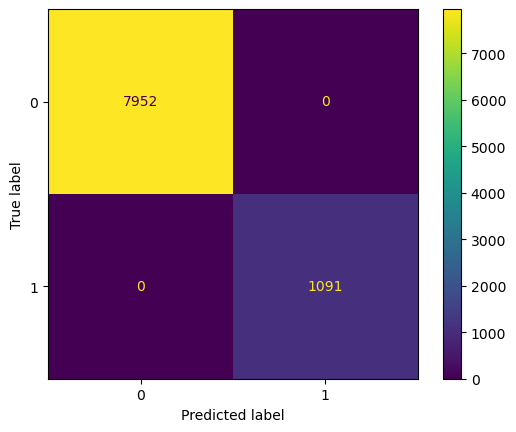

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

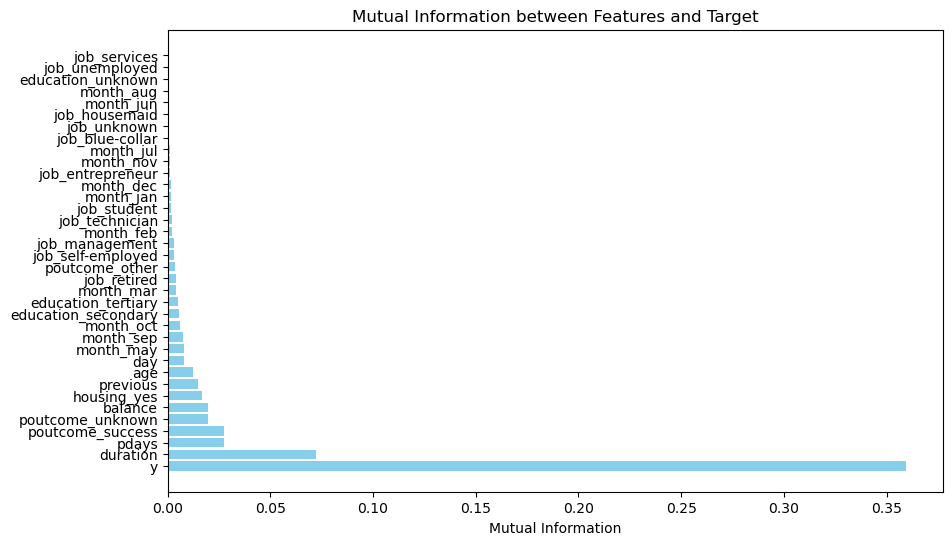

In [72]:
import matplotlib.pyplot as plt

# Визуализируем взаимную информацию
plt.figure(figsize=(10, 6))
plt.barh(mutual_info_df.index, mutual_info_df['Mutual Info'], color='skyblue')
plt.xlabel('Mutual Information')
plt.title('Mutual Information between Features and Target')
plt.show()

In [73]:
import joblib

joblib.dump(model, 'logistic_regression_model.pkl')
loaded_model = joblib.load('logistic_regression_model.pkl')

y_pred_loaded = loaded_model.predict(X_test)